# Load the dataframe

import pandas as pd

In [8]:
df = pd.read_csv("TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [9]:
df

STAID   SOUID       DATE     TG   Q_TG
0          1   35381 1860-01-01     21      0
1          1   35381 1860-01-02     46      0
2          1   35381 1860-01-03     31      0
3          1   35381 1860-01-04     37      0
4          1   35381 1860-01-05     31      0
...      ...     ...        ...    ...    ...
59316      1   35381 2022-05-27  -9999      9
59317      1   35381 2022-05-28  -9999      9
59318      1   35381 2022-05-29  -9999      9
59319      1   35381 2022-05-30  -9999      9
59320      1   35381 2022-05-31  -9999      9

[59321 rows x 5 columns]

# Show specific shows

In [10]:
df[10:20]

STAID   SOUID       DATE     TG   Q_TG
10      1   35381 1860-01-11     -5      0
11      1   35381 1860-01-12    -18      0
12      1   35381 1860-01-13    -27      0
13      1   35381 1860-01-14    -26      0
14      1   35381 1860-01-15    -37      0
15      1   35381 1860-01-16     -9      0
16      1   35381 1860-01-17      7      0
17      1   35381 1860-01-18     -6      0
18      1   35381 1860-01-19    -16      0
19      1   35381 1860-01-20    -19      0

In [12]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [13]:
df["   TG"]

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

In [15]:
df[['   TG', '    DATE']]

TG       DATE
0        21 1860-01-01
1        46 1860-01-02
2        31 1860-01-03
3        37 1860-01-04
4        31 1860-01-05
...     ...        ...
59316 -9999 2022-05-27
59317 -9999 2022-05-28
59318 -9999 2022-05-29
59319 -9999 2022-05-30
59320 -9999 2022-05-31

[59321 rows x 2 columns]

# Simple Statistics and filtering

In [20]:
round(df.loc[df['   TG'] != -9999]['   TG'].mean() / 10, 2)

6.36

In [21]:
round(df.loc[df['   TG'] != -9999]['   TG'].min() / 10, 2)

-28.8

In [22]:
round(df.loc[df['   TG'] != -9999]['   TG'].max() / 10, 2)

26.2

<Axes: >

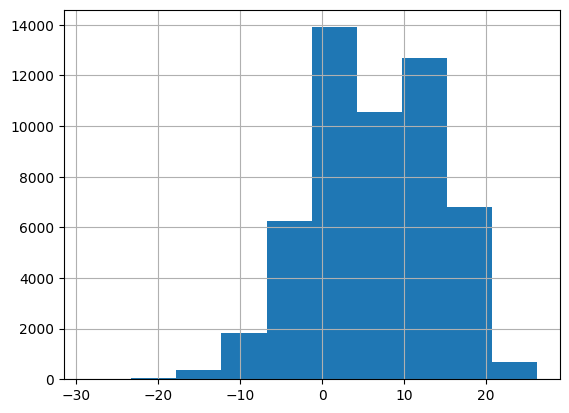

In [28]:
histogram = df.loc[df['   TG'] != -9999]['   TG'] / 10
histogram.hist()

In [30]:
df

STAID   SOUID       DATE     TG   Q_TG
0          1   35381 1860-01-01     21      0
1          1   35381 1860-01-02     46      0
2          1   35381 1860-01-03     31      0
3          1   35381 1860-01-04     37      0
4          1   35381 1860-01-05     31      0
...      ...     ...        ...    ...    ...
59316      1   35381 2022-05-27  -9999      9
59317      1   35381 2022-05-28  -9999      9
59318      1   35381 2022-05-29  -9999      9
59319      1   35381 2022-05-30  -9999      9
59320      1   35381 2022-05-31  -9999      9

[59321 rows x 5 columns]

In [31]:
df.loc[df['    DATE']=="1860-01-05"]['   TG'].squeeze() / 10

3.1

In [33]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [36]:
df.loc[3, '   TG'] / 10

3.7

# Calculate new column from existing

In [65]:
import numpy as np
df["TG"] = df["   TG"] / 10
df["Fahrenheit"] = df["TG"] * (9/5) + 32
df["TG0"] = df["   TG"].mask(df["   TG"]==-9999, np.nan)
df["   TG"] = df["   TG"].mask(df["   TG"]==-9999, np.nan)
df["TG"] = df["TG"].mask(df["TG"]==-999, np.nan)
df["Fahrenheit"] = df["Fahrenheit"].mask(df["Fahrenheit"]==-1767.82, np.nan)

In [66]:
df

STAID   SOUID       DATE     TG   Q_TG   TG  Fahrenheit   TG0
0          1   35381 1860-01-01   21.0      0  2.1       35.78  21.0
1          1   35381 1860-01-02   46.0      0  4.6       40.28  46.0
2          1   35381 1860-01-03   31.0      0  3.1       37.58  31.0
3          1   35381 1860-01-04   37.0      0  3.7       38.66  37.0
4          1   35381 1860-01-05   31.0      0  3.1       37.58  31.0
...      ...     ...        ...    ...    ...  ...         ...   ...
59316      1   35381 2022-05-27    NaN      9  NaN         NaN   NaN
59317      1   35381 2022-05-28    NaN      9  NaN         NaN   NaN
59318      1   35381 2022-05-29    NaN      9  NaN         NaN   NaN
59319      1   35381 2022-05-30    NaN      9  NaN         NaN   NaN
59320      1   35381 2022-05-31    NaN      9  NaN         NaN   NaN

[59321 rows x 8 columns]

# Plotting

<Axes: >

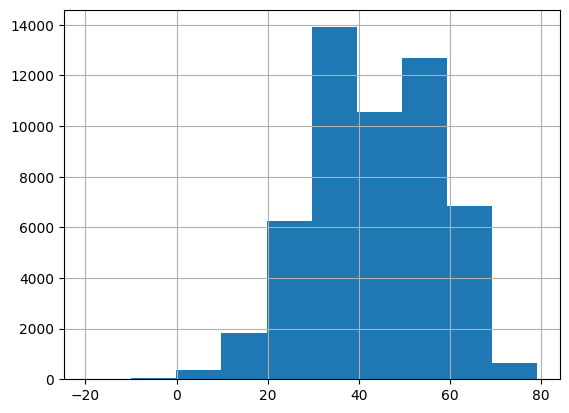

In [70]:
df["Fahrenheit"].hist()

<Axes: xlabel='    DATE'>

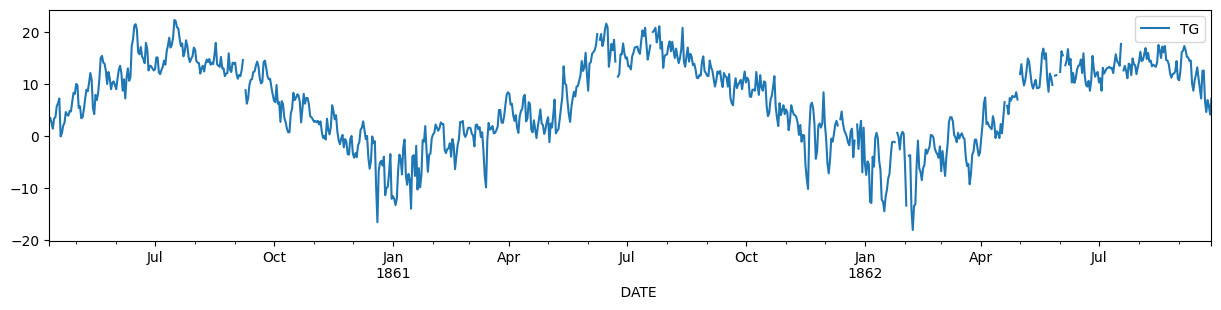

In [72]:
df[100:1000].plot(x="    DATE", y="TG", figsize=(15, 3))